In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
train=pd.read_excel('train_agriculture.xlsx')


In [3]:
train

,ID,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
0,F00000001,188,1,0,1,0,0.0,0,1,0
1,F00000003,209,1,0,1,0,0.0,0,2,1
2,F00000004,257,1,0,1,0,0.0,0,2,1
3,F00000005,257,1,1,1,0,0.0,0,2,1
4,F00000006,342,1,0,1,0,0.0,0,2,1
...,...,...,...,...,...,...,...,...,...,...
4594,F00008078,2138,0,1,2,20,NaN,1,1,1
4595,F00008079,2139,0,1,2,30,47.0,2,1,1
4596,F00008080,2267,0,1,2,10,7.0,27,2,0
4597,F00008082,2267,0,1,2,10,20.0,24,2,0


In [4]:
train.shape

(4599, 10)

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4599 entries, 0 to 4598
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       4599 non-null   object 
 1   Estimated_Insects_Count  4599 non-null   int64  
 2   Crop_Type                4599 non-null   int64  
 3   Soil_Type                4599 non-null   int64  
 4   Pesticide_Use_Category   4599 non-null   int64  
 5   Number_Doses_Week        4599 non-null   int64  
 6   Number_Weeks_Used        4157 non-null   float64
 7   Number_Weeks_Quit        4599 non-null   int64  
 8   Season                   4599 non-null   int64  
 9   Crop_Damage              4599 non-null   int64  
dtypes: float64(1), int64(8), object(1)
memory usage: 359.4+ KB


In [6]:
train.isnull().sum()

ID                           0
Estimated_Insects_Count      0
Crop_Type                    0
Soil_Type                    0
Pesticide_Use_Category       0
Number_Doses_Week            0
Number_Weeks_Used          442
Number_Weeks_Quit            0
Season                       0
Crop_Damage                  0
dtype: int64

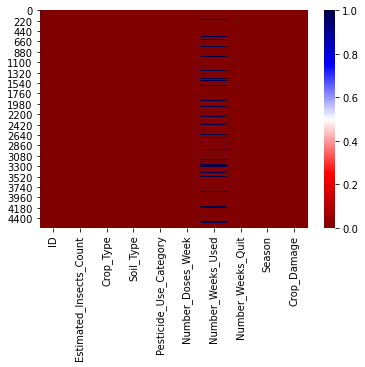

In [7]:
sns.heatmap(train.isnull(),cmap='seismic_r')

In [8]:
# Removing null values
from sklearn.impute import SimpleImputer
si=SimpleImputer(strategy='mean')

In [9]:
train['Number_Weeks_Used'].fillna(train['Number_Weeks_Used'].mean(),inplace=True)

In [10]:
train.head(10)

,ID,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
0,F00000001,188,1,0,1,0,0.000000,0,1,0
1,F00000003,209,1,0,1,0,0.000000,0,2,1
2,F00000004,257,1,0,1,0,0.000000,0,2,1
3,F00000005,257,1,1,1,0,0.000000,0,2,1
4,F00000006,342,1,0,1,0,0.000000,0,2,1
5,F00000008,448,0,1,1,0,28.891027,0,2,1
6,F00000009,448,0,1,1,0,28.891027,0,2,1
7,F00000010,577,1,0,1,0,0.000000,0,1,2
8,F00000012,731,0,0,1,0,0.000000,0,2,0
9,F00000020,1132,1,0,1,0,0.000000,0,1,2


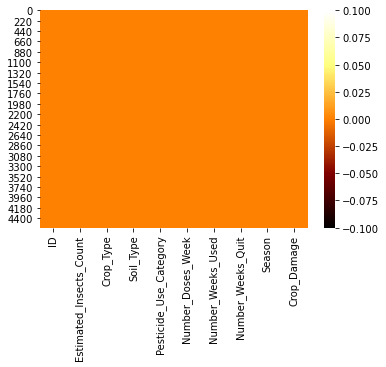

In [11]:
sns.heatmap(train.isnull(),cmap='afmhot')

In [12]:
train.describe()

,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
count,4599.000000,4599.000000,4599.000000,4599.000000,4599.000000,4599.000000,4599.000000,4599.000000,4599.000000
mean,1363.000435,0.224831,0.476625,2.283540,26.477495,28.891027,9.205479,1.894325,0.194390
std,814.439120,0.417517,0.499508,0.471978,15.524647,11.965785,9.713253,0.694952,0.454597
min,150.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,731.000000,0.000000,0.000000,2.000000,15.000000,20.000000,0.000000,1.000000,0.000000
50%,1212.000000,0.000000,0.000000,2.000000,20.000000,28.891027,7.000000,2.000000,0.000000
75%,1786.000000,0.000000,1.000000,3.000000,40.000000,36.000000,16.000000,2.000000,0.000000
max,4097.000000,1.000000,1.000000,3.000000,95.000000,66.000000,47.000000,3.000000,2.000000


Observations:
1. For the column name Estimated_Insects_Count its std is very high and its 75% and max has a huge gap which shows there are outliers. and its mean is greater than its median whhich shows that the data is right skewed.
2. For the column name Crop_Type its mean is greater than median  so it is right skewed.
3. For the column name Soil_Type its mean is greater than median so it is right skewed.
4. For the column name Pesticide_Use_Category  there is no difference seen in 75% and max  so there are no outliers present in it.
5. For the column name Number_weeks_Used there is difference seen in 75% and max so there are outliers and the mean and median of it is same which shows it is normally distributed.
6. For the column name Number_Doses_Week  in this mean is greater than median so it is right skewed and its 75% and max has huge gap which shows there are outlieres present in it.
7. For the column name Number_Weeks_Quit its 75% and max has huge gap which shows there are outliers present and data is right skewed.

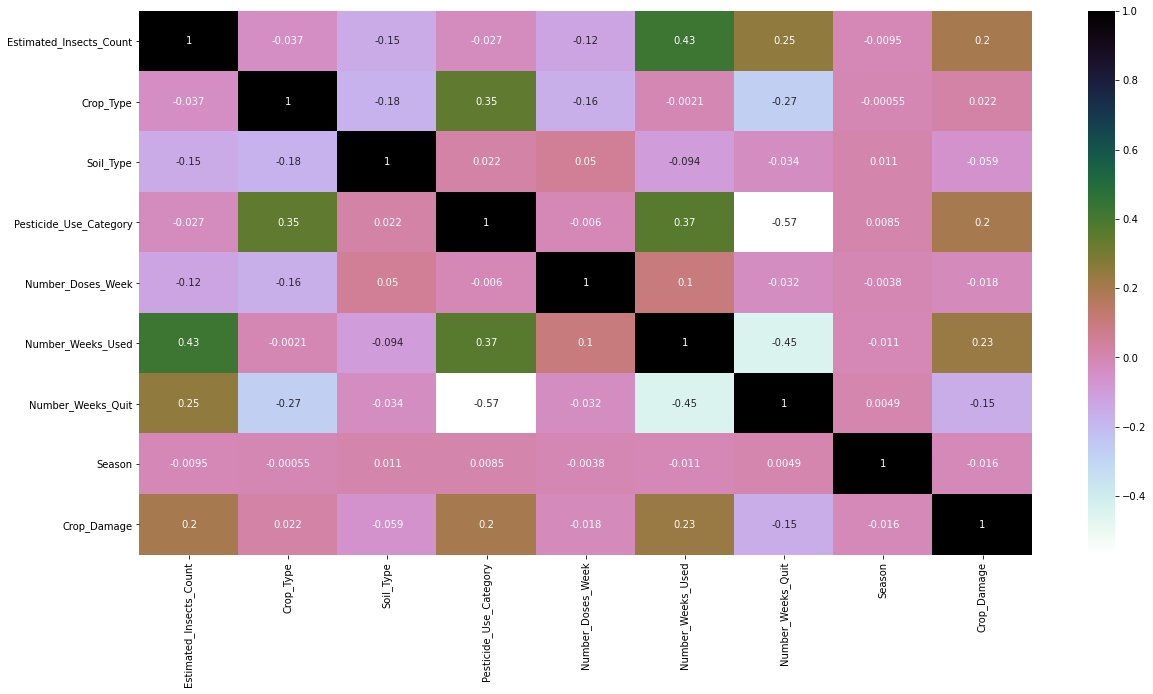

In [13]:
plt.figure(figsize=(20,10))
sns.heatmap(train.corr(),annot=True,cmap='cubehelix_r')

Observations:
    
1. Number_Weeks_Quit is negatively correlated with Pesticide_Use_Category and Number_Weeks_Used. 

0    3565
1    1034
Name: Crop_Type, dtype: int64


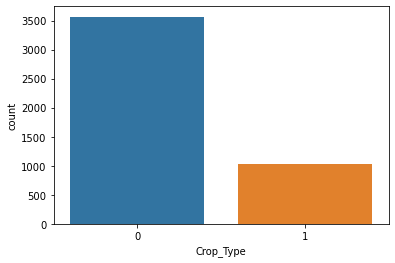

In [14]:
sns.countplot(train['Crop_Type'])
print(train['Crop_Type'].value_counts())

For crop Type  class 0 we have 3536 counts & for crop type class 1 we have 1034 counts.

2    3205
3    1349
1      45
Name: Pesticide_Use_Category, dtype: int64


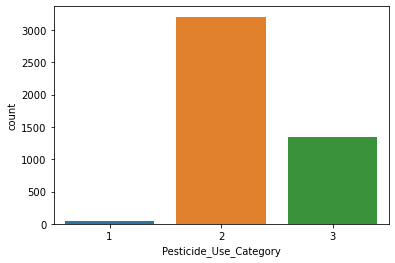

In [15]:
sns.countplot(train['Pesticide_Use_Category'])
print(train['Pesticide_Use_Category'].value_counts())

pesticide 1 which is never used on 45 crops.
pesticide 2 which is previously used is been seen frequently used in the dataset.
pesticide 3 which is currently used is been seen used for 1349 times.

0    2407
1    2192
Name: Soil_Type, dtype: int64


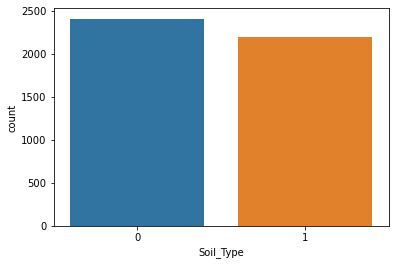

In [16]:
sns.countplot(train['Soil_Type'])
print(train['Soil_Type'].value_counts())

category of soil type 0 and 1 we see that class 0 has 2407 counts and for class 1 it is 2192. 

2    2327
1    1379
3     893
Name: Season, dtype: int64


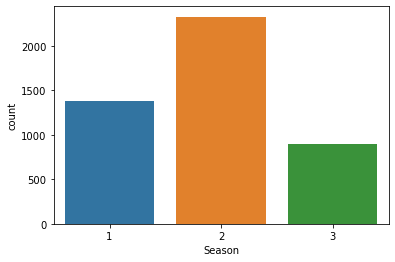

In [17]:
sns.countplot(train['Season'])
print(train['Season'].value_counts())

In season there are 3 categories maximum no's of counts are seen in season 2, followed by 1 and then 3.

0    3820
1     664
2     115
Name: Crop_Damage, dtype: int64


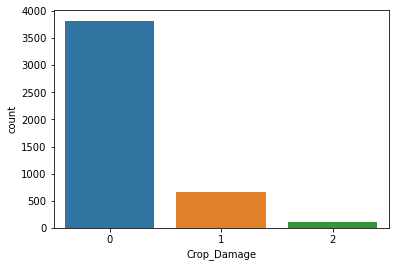

In [18]:
sns.countplot(train['Crop_Damage'])
print(train['Crop_Damage'].value_counts())

crop damage in which 0- alive 1- damaged due to other causes and 2- damaged due to pesticides.
In Crop_Damage  we can see maximum of 0= alive crops followed by 1 and then 2.

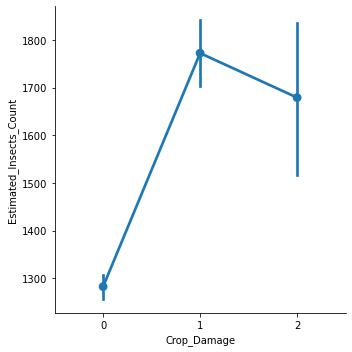

In [19]:
sns.factorplot(x='Crop_Damage',y='Estimated_Insects_Count',data=train)

for crop damage- alive'0' we see less no of insects counts
similarly for  damaged due to others'1' we maximum no of insects counts compared with other two(0,2).

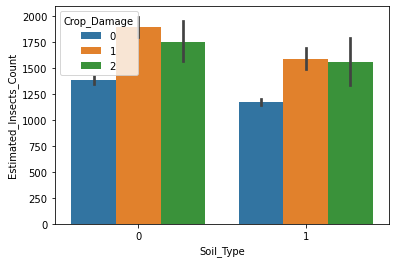

In [20]:
sns.barplot(x='Soil_Type',y='Estimated_Insects_Count', hue='Crop_Damage',data=train)

considering soil type we see that  in soil type 0 there are maximum insects estimated per square mtr count than of type 1.

In [21]:
cr=pd.crosstab(train['Soil_Type'],train['Crop_Damage'])
cr

Crop_Damage,0,1,2
Soil_Type,,,
0,1947,390,70
1,1873,274,45


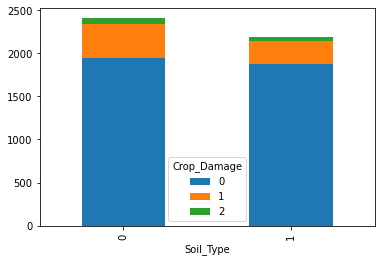

In [22]:
cr.plot(kind='bar',stacked=True)

In soil type 0 we see that crop damage due to some other reasons and also crop damage due to pesticides is higher than  in soil type 1.

In [23]:
cr1=pd.crosstab(train['Pesticide_Use_Category'],train['Crop_Damage'])
cr1

Crop_Damage,0,1,2
Pesticide_Use_Category,,,
1,7,33,5
2,2881,290,34
3,932,341,76


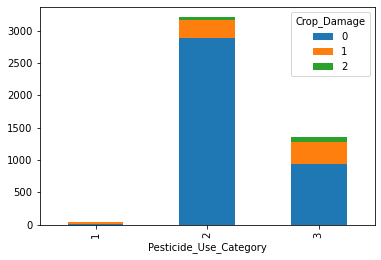

In [24]:
cr1.plot(kind='bar',stacked=True)

there is highest crop damage(by some other reasons) on the crops on which fertilizers are currently used.

In [25]:
cr2=pd.crosstab(train['Season'],train['Crop_Damage'])
cr2

Crop_Damage,0,1,2
Season,,,
1,1150,192,37
2,1908,358,61
3,762,114,17


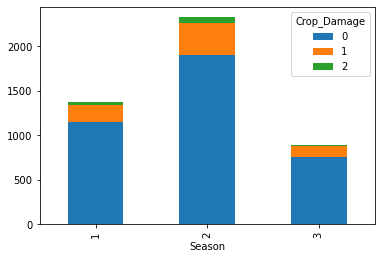

In [26]:
cr2.plot(kind='bar',stacked=True)

in season 2  we see highest values of crop damage than other 2 seasons.

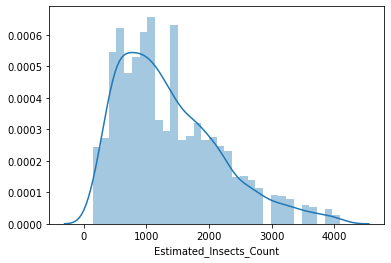

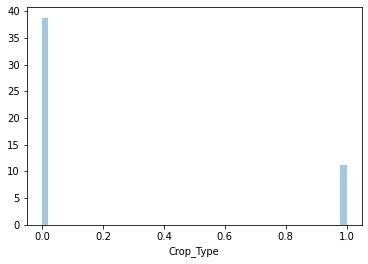

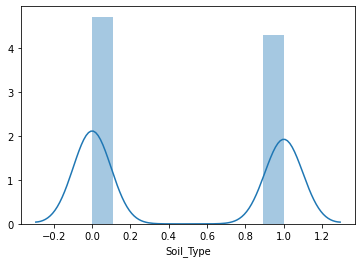

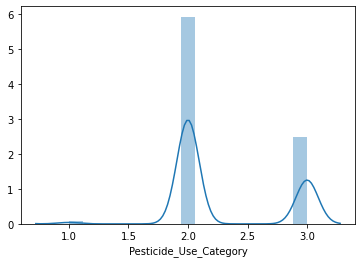

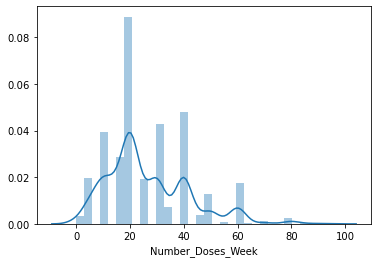

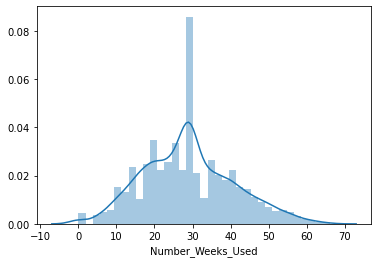

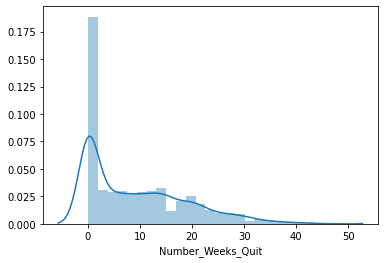

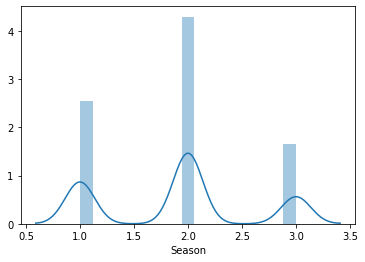

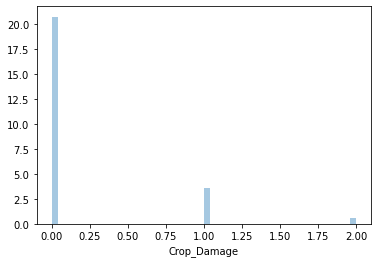

In [27]:
for i in train.describe():
    sns.distplot(train[i])
    plt.show()

1. Estimated_Insects_Count is right skewed.
2. Number_Weeks_Quit is a right skewed data.
3. Number_Doses_Week is a right skewed data.
4. Number_Weeks_Used is a bell shaped curve having normal distribution.

In [28]:
#checking the skewness of the data
train.skew()

Estimated_Insects_Count    0.911469
Crop_Type                  1.318693
Soil_Type                  0.093631
Pesticide_Use_Category     0.678586
Number_Doses_Week          0.945895
Number_Weeks_Used          0.278664
Number_Weeks_Quit          0.919771
Season                     0.144841
Crop_Damage                2.306933
dtype: float64

In [29]:
#dropping  the column ID before removing skewness as the column have unique entries for all the rows.
train['ID'].value_counts()

F00007272    1
F00004001    1
F00005407    1
F00006374    1
F00000991    1
            ..
F00004040    1
F00006878    1
F00005534    1
F00005989    1
F00000189    1
Name: ID, Length: 4599, dtype: int64

In [30]:
train.drop(['ID'],axis=1,inplace=True)
train

,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
0,188,1,0,1,0,0.000000,0,1,0
1,209,1,0,1,0,0.000000,0,2,1
2,257,1,0,1,0,0.000000,0,2,1
3,257,1,1,1,0,0.000000,0,2,1
4,342,1,0,1,0,0.000000,0,2,1
...,...,...,...,...,...,...,...,...,...
4594,2138,0,1,2,20,28.891027,1,1,1
4595,2139,0,1,2,30,47.000000,2,1,1
4596,2267,0,1,2,10,7.000000,27,2,0
4597,2267,0,1,2,10,20.000000,24,2,0


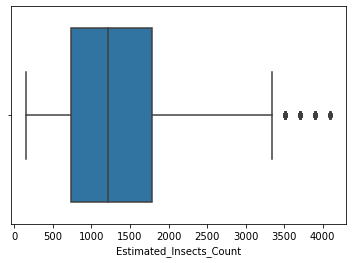

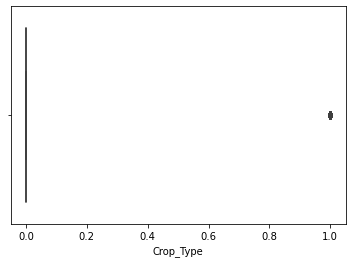

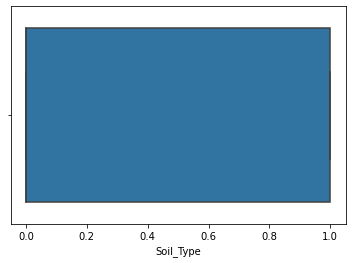

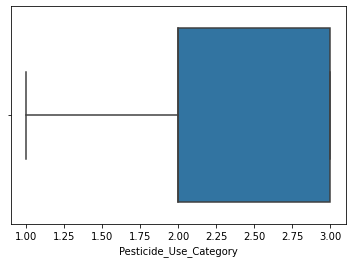

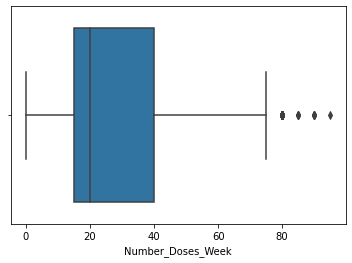

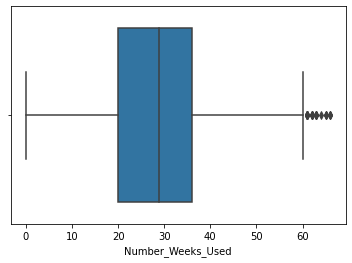

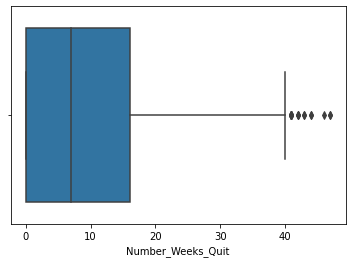

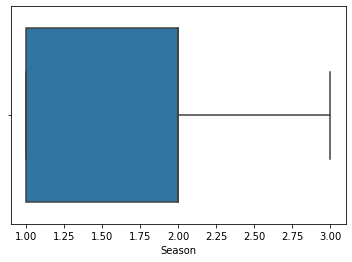

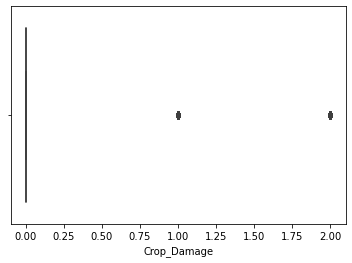

In [31]:
# Checking presence of ouliers
for i in train.columns:
    sns.boxplot(train[i])
    plt.show()

Columns: Estimated_Insects_Count, Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit have outliers. We will remove the outliers using zscore.

In [32]:
#Removing skewness using power transform.

from sklearn.preprocessing import PowerTransformer
pt=PowerTransformer(method='yeo-johnson')

In [33]:
for i in train.skew().index[0:-1]:
    if train.skew().loc[i]>0.55:
        train[i]=pt.fit_transform(train[i].values.reshape(-1,1))
    else:
        train[i]=train[i]

In [34]:
train.skew()

Estimated_Insects_Count   -0.032846
Crop_Type                  1.318693
Soil_Type                  0.093631
Pesticide_Use_Category    -0.047595
Number_Doses_Week          0.008110
Number_Weeks_Used          0.278664
Number_Weeks_Quit         -0.089868
Season                     0.144841
Crop_Damage                2.306933
dtype: float64

In [35]:
#Removing the outliers.
from scipy.stats import zscore
z=np.abs(zscore(train))

In [36]:
agri=train[(z<3).all(axis=1)]
agri

,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
24,-2.443502,-0.538556,0,1.439192,0.381917,26.000000,-1.240226,2,0
25,-2.437844,-0.538556,0,1.439192,0.928904,20.000000,-1.240226,1,0
26,-2.443502,-0.538556,0,1.439192,1.827551,15.000000,-1.240226,2,0
27,-2.345441,-0.538556,1,1.439192,-0.279016,14.000000,-1.240226,2,0
28,-2.345441,-0.538556,1,1.439192,-0.279016,15.000000,-1.240226,2,1
...,...,...,...,...,...,...,...,...,...
4594,1.003197,-0.538556,1,-0.544586,-0.279016,28.891027,-0.788394,1,1
4595,1.004073,-0.538556,1,-0.544586,0.381917,47.000000,-0.504125,1,1
4596,1.114021,-0.538556,1,-0.544586,-1.160435,7.000000,1.368852,2,0
4597,1.114021,-0.538556,1,-0.544586,-1.160435,20.000000,1.259832,2,0


In [37]:
print('Shape before removing outliers: ',train.shape,'\nShape after removing outliers: ',agri.shape)


Shape before removing outliers:  (4599, 9) 
Shape after removing outliers:  (4437, 9)


In [38]:
agri.skew()

Estimated_Insects_Count   -0.032195
Crop_Type                  1.336758
Soil_Type                  0.087108
Pesticide_Use_Category     0.949878
Number_Doses_Week          0.200350
Number_Weeks_Used          0.350445
Number_Weeks_Quit         -0.138842
Season                     0.143651
Crop_Damage                2.057431
dtype: float64

In [39]:
#Splitting the data into x_train and y_train
x_train=agri.drop(['Crop_Damage'],axis=1)
y_train=agri['Crop_Damage']

In [40]:
x_train

,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season
24,-2.443502,-0.538556,0,1.439192,0.381917,26.000000,-1.240226,2
25,-2.437844,-0.538556,0,1.439192,0.928904,20.000000,-1.240226,1
26,-2.443502,-0.538556,0,1.439192,1.827551,15.000000,-1.240226,2
27,-2.345441,-0.538556,1,1.439192,-0.279016,14.000000,-1.240226,2
28,-2.345441,-0.538556,1,1.439192,-0.279016,15.000000,-1.240226,2
...,...,...,...,...,...,...,...,...
4594,1.003197,-0.538556,1,-0.544586,-0.279016,28.891027,-0.788394,1
4595,1.004073,-0.538556,1,-0.544586,0.381917,47.000000,-0.504125,1
4596,1.114021,-0.538556,1,-0.544586,-1.160435,7.000000,1.368852,2
4597,1.114021,-0.538556,1,-0.544586,-1.160435,20.000000,1.259832,2


In [41]:
y_train

24      0
25      0
26      0
27      0
28      1
       ..
4594    1
4595    1
4596    0
4597    0
4598    0
Name: Crop_Damage, Length: 4437, dtype: int64

In [42]:
# NOw for x_test we will now import the test data of agriculture dataset.

test=pd.read_excel('test_agriculture.xlsx')
test

,ID,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season
0,F00000002,188,1,1,1,0,NaN,0,2
1,F00000007,410,1,1,1,0,0.0,0,2
2,F00000011,626,1,0,1,0,0.0,0,2
3,F00000013,731,1,0,1,0,0.0,0,2
4,F00000014,789,0,0,1,0,0.0,0,1
...,...,...,...,...,...,...,...,...,...
1194,F00003133,1132,0,1,2,40,34.0,7,3
1195,F00003135,1132,0,1,2,40,25.0,3,1
1196,F00003138,1132,0,1,2,20,13.0,23,1
1197,F00003149,1212,0,1,2,10,35.0,5,1


In [43]:
# Dropping of  ID column as we did before in train data.
test.drop(['ID'],axis=1,inplace=True)
test

,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season
0,188,1,1,1,0,NaN,0,2
1,410,1,1,1,0,0.0,0,2
2,626,1,0,1,0,0.0,0,2
3,731,1,0,1,0,0.0,0,2
4,789,0,0,1,0,0.0,0,1
...,...,...,...,...,...,...,...,...
1194,1132,0,1,2,40,34.0,7,3
1195,1132,0,1,2,40,25.0,3,1
1196,1132,0,1,2,20,13.0,23,1
1197,1212,0,1,2,10,35.0,5,1


In [44]:
#Here we can see NaN values in Number_Weeks_Used
test.isnull().sum()

Estimated_Insects_Count      0
Crop_Type                    0
Soil_Type                    0
Pesticide_Use_Category       0
Number_Doses_Week            0
Number_Weeks_Used          119
Number_Weeks_Quit            0
Season                       0
dtype: int64

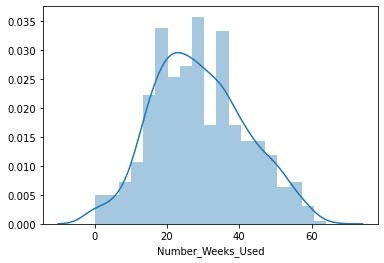

In [45]:
#Removing null values
sns.distplot(test['Number_Weeks_Used'])

as we can see Number_Weeks_Used is normally distributed data so we will replace it by its mean for its nullvalues.

In [46]:
gh=SimpleImputer(strategy='mean')
test['Number_Weeks_Used']=gh.fit_transform(test['Number_Weeks_Used'].values.reshape(-1,1))

In [47]:
test.isnull().sum()

Estimated_Insects_Count    0
Crop_Type                  0
Soil_Type                  0
Pesticide_Use_Category     0
Number_Doses_Week          0
Number_Weeks_Used          0
Number_Weeks_Quit          0
Season                     0
dtype: int64

In [48]:
#Checking for skewness
test.skew()

Estimated_Insects_Count    1.098665
Crop_Type                  1.546968
Soil_Type                  0.179422
Pesticide_Use_Category     0.089675
Number_Doses_Week          0.872028
Number_Weeks_Used          0.220343
Number_Weeks_Quit          1.191013
Season                     0.155872
dtype: float64

Number_Doses_Week and Number_Weeks_Quit are the non-categorical data with skewness

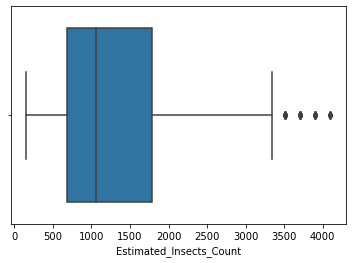

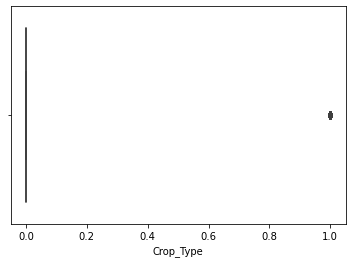

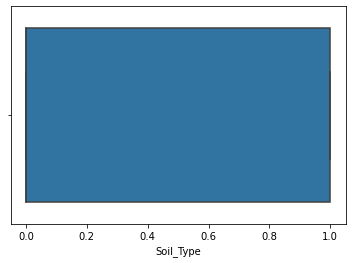

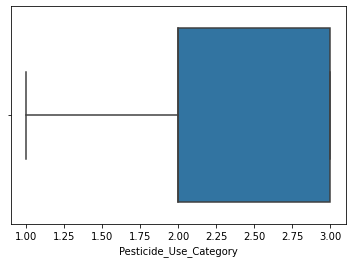

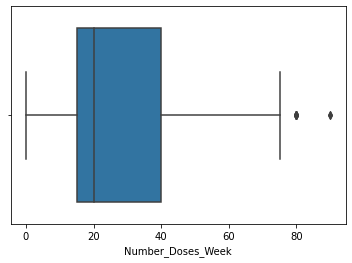

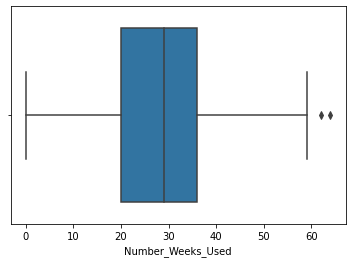

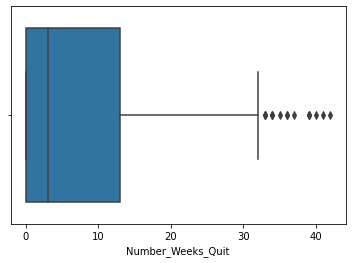

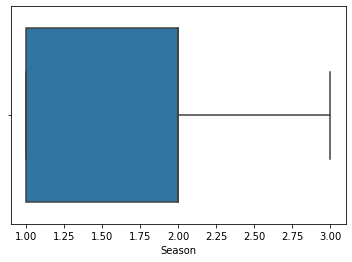

In [49]:
#Checking for outliers
for i in test.columns:
    sns.boxplot(test[i])
    plt.show()

In [50]:
#Removing skewness using PowerTransformer

for i in test.skew().index:
    if test.skew().loc[i]>0.55:
        test[i]=pt.fit_transform(test[i].values.reshape(-1,1))
    else:
        test[i]=test[i]

In [51]:
test.skew()

Estimated_Insects_Count   -0.016231
Crop_Type                  1.546968
Soil_Type                  0.179422
Pesticide_Use_Category     0.089675
Number_Doses_Week         -0.006111
Number_Weeks_Used          0.220343
Number_Weeks_Quit          0.115384
Season                     0.155872
dtype: float64

In [52]:
#Removing outliers
zz=np.abs(zscore(test))
zz

array([[2.25611284e+00, 2.03615391e+00, 1.09360445e+00, ...,
        5.85986262e-16, 1.03063387e+00, 1.72804130e-01],
       [1.32439628e+00, 2.03615391e+00, 1.09360445e+00, ...,
        2.39438582e+00, 1.03063387e+00, 1.72804130e-01],
       [7.68063353e-01, 2.03615391e+00, 9.14407397e-01, ...,
        2.39438582e+00, 1.03063387e+00, 1.72804130e-01],
       ...,
       [7.60585503e-02, 4.91122009e-01, 1.09360445e+00, ...,
        1.32227276e+00, 1.34448774e+00, 1.28629553e+00],
       [1.78537072e-01, 4.91122009e-01, 1.09360445e+00, ...,
        4.92072401e-01, 4.46391027e-01, 1.28629553e+00],
       [1.78537072e-01, 4.91122009e-01, 1.09360445e+00, ...,
        5.85986262e-16, 1.26592298e+00, 1.63190379e+00]])

In [53]:
#threshold=3
test_new=test[(zz<3).all(axis=1)]
test_new

,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season
0,-2.256113,2.036154,1,1,-2.642157,29.033333,-1.030634,2
1,-1.324396,2.036154,1,1,-2.642157,0.000000,-1.030634,2
2,-0.768063,2.036154,0,1,-2.642157,0.000000,-1.030634,2
3,-0.554689,2.036154,0,1,-2.642157,0.000000,-1.030634,2
4,-0.447685,-0.491122,0,1,-2.642157,0.000000,-1.030634,1
...,...,...,...,...,...,...,...,...
1194,0.076059,-0.491122,1,2,0.890910,34.000000,0.648513,3
1195,0.076059,-0.491122,1,2,0.890910,25.000000,0.146202,1
1196,0.076059,-0.491122,1,2,-0.264468,13.000000,1.344488,1
1197,0.178537,-0.491122,1,2,-1.083697,35.000000,0.446391,1


In [54]:
print('Shape before removing outliers: ',test.shape,'\nShape after removing outliers: ',test_new.shape)

Shape before removing outliers:  (1199, 8) 
Shape after removing outliers:  (1199, 8)


In [55]:
#Using Min-Max Scaler on x_train and x_test
from sklearn.preprocessing import MinMaxScaler
mns=MinMaxScaler()

In [56]:
train=mns.fit_transform(x_train)
x_train=pd.DataFrame(train,columns=x_train.columns)
x_train

,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season
0,0.000000,0.0,0.0,1.0,0.463378,0.355932,0.000000,0.5
1,0.001181,0.0,0.0,1.0,0.579939,0.254237,0.000000,0.0
2,0.000000,0.0,0.0,1.0,0.771439,0.169492,0.000000,0.5
3,0.020465,0.0,1.0,1.0,0.322534,0.152542,0.000000,0.5
4,0.020465,0.0,1.0,1.0,0.322534,0.169492,0.000000,0.5
...,...,...,...,...,...,...,...,...
4432,0.719303,0.0,1.0,0.0,0.322534,0.404933,0.143408,0.0
4433,0.719486,0.0,1.0,0.0,0.463378,0.711864,0.233633,0.0
4434,0.742431,0.0,1.0,0.0,0.134706,0.033898,0.828101,0.5
4435,0.742431,0.0,1.0,0.0,0.134706,0.254237,0.793499,0.5


In [57]:
#x_test after saling the data using Min Max Scaler
scale_test=mns.fit_transform(test_new)
x_test=pd.DataFrame(scale_test,columns=test_new.columns)
x_test

,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season
0,0.052814,1.0,1.0,0.0,0.000000,0.453646,0.000000,0.5
1,0.250663,1.0,1.0,0.0,0.000000,0.000000,0.000000,0.5
2,0.368799,1.0,0.0,0.0,0.000000,0.000000,0.000000,0.5
3,0.414109,1.0,0.0,0.0,0.000000,0.000000,0.000000,0.5
4,0.436831,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0
...,...,...,...,...,...,...,...,...
1194,0.548047,0.0,1.0,0.5,0.644685,0.531250,0.621845,1.0
1195,0.548047,0.0,1.0,0.5,0.644685,0.390625,0.435822,0.0
1196,0.548047,0.0,1.0,0.5,0.433861,0.203125,0.879588,0.0
1197,0.569808,0.0,1.0,0.5,0.284375,0.546875,0.546992,0.0


In [58]:
x_train.shape

(4437, 8)

In [59]:
y_train.shape

(4437,)

In [60]:
y_train

24      0
25      0
26      0
27      0
28      1
       ..
4594    1
4595    1
4596    0
4597    0
4598    0
Name: Crop_Damage, Length: 4437, dtype: int64

In [61]:
x_test.shape

(1199, 8)

In [62]:
x_train.skew()

Estimated_Insects_Count   -0.032195
Crop_Type                  1.336758
Soil_Type                  0.087108
Pesticide_Use_Category     0.949878
Number_Doses_Week          0.200350
Number_Weeks_Used          0.350445
Number_Weeks_Quit         -0.138842
Season                     0.143651
dtype: float64

In [63]:
x_test.skew()

Estimated_Insects_Count   -0.016231
Crop_Type                  1.546968
Soil_Type                  0.179422
Pesticide_Use_Category     0.089675
Number_Doses_Week         -0.006111
Number_Weeks_Used          0.220343
Number_Weeks_Quit          0.115384
Season                     0.155872
dtype: float64

In [65]:
#Modelling the data

from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
list=[MultinomialNB(),SVC(),DecisionTreeClassifier(),KNeighborsClassifier()]
for j in list:
    print('For the algorithm: ',j)
    j.fit(x_train,y_train)
    pred=j.predict(x_test)
    print('Score is ',j.score(x_train,y_train))
    print("************************************************************************")

For the algorithm:  MultinomialNB()
Score is  0.8584629254000451
************************************************************************
For the algorithm:  SVC()
Score is  0.8584629254000451
************************************************************************
For the algorithm:  DecisionTreeClassifier()
Score is  0.9986477349560514
************************************************************************
For the algorithm:  KNeighborsClassifier()
Score is  0.8762677484787018
************************************************************************


In [66]:
# Using ensemble techniques to boost up our score
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import BaggingClassifier
list=[RandomForestClassifier(),AdaBoostClassifier(),GradientBoostingClassifier(),BaggingClassifier()]
for m in list:
    m.fit(x_train,y_train)
    score=m.score(x_train,y_train)
    predict=m.predict(x_test)
    print('Score of',m,"is:",score)

Score of RandomForestClassifier() is: 0.9984223574487266
Score of AdaBoostClassifier() is: 0.8602659454586432
Score of GradientBoostingClassifier() is: 0.8722109533468559
Score of BaggingClassifier() is: 0.981519044399369


Decision tree classifier and  RandomForestClassifier  both are performing above 0.99.
 we will futher move with random forest classifier as this model doesnt overfit easily.

In [71]:
#Searching for the best parameters for Random Forest Classifier
#GridSearchCV
from sklearn.model_selection import GridSearchCV
rc=RandomForestClassifier()
parameters={ 'random_state': range(33,55),
           'criterion':['gini','entropy']
           }
cv=GridSearchCV(rnc,parameters)
cv.fit(x_train,y_train)
print(cv.best_params_)

{'criterion': 'entropy', 'random_state': 44}


In [74]:
#Working with the best paramteres
rc=RandomForestClassifier(random_state=44,criterion='gini')
rc.fit(x_train,y_train)
print('Score:',rc.score(x_train,y_train))
print('Result of prediction:',rc.predict(x_test))


Score: 0.9986477349560514
Result of prediction: [0 0 0 ... 0 0 0]


In [75]:
# cross validation score to check the under fitting and over fitting of the data
from sklearn.model_selection import cross_val_score
cv=cross_val_score(rc,x_train,y_train,cv=5)
print('The cross validation score is: ',cv)
print('The mean and standard deviations are: ',cv.mean(),cv.std())


The cross validation score is:  [0.81306306 0.84572072 0.85456595 0.83652762 0.84667418]
The mean and standard deviations are:  0.8393103080532617 0.014315837015263453


In [76]:
#Saving the best model Random Forest Classifier with best parameters.
import joblib
joblib.dump(rc,'agricluture.pkl')

['agricluture.pkl']